Common methodology for recognizing digits in images without R-CNN:
1. Localize object
2. Extract the object
4. OCR on object

OpenCV image processing reference: https://docs.opencv.org/3.4/d2/d96/tutorial_py_table_of_contents_imgproc.html

0.jpg contents: 212 
1.jpg contents: 
2.jpg contents: 
3.jpg contents: 


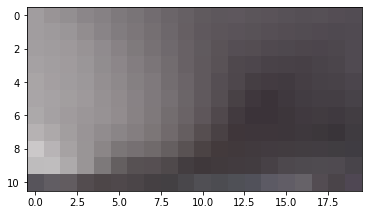

In [24]:
import image_processing_util as ipu

from imutils.perspective import four_point_transform
import cv2 as cv
import imutils
import matplotlib.pyplot as plt
import os
import pytesseract
 
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

image = cv.imread("hall1.jpg")
image = imutils.resize(image, height=1000)

#Step 1: Localize object
edges = ipu.get_edges(image)
candidate_list = ipu.get_quadrilaterals(edges)

#Step 2: Extract object
candidates  = len(candidate_list)
if candidates>10:#So the out folder doesn't blow up
    candidates = 10
for i in range(candidates):
    warped = four_point_transform(image, candidate_list[i].reshape(4, 2))
    plt.imshow(warped)
    abs_path = os.path.abspath("out")
    plt.savefig(os.path.join(abs_path, str(i)+'.jpg'))
    #Step 3: OCR
    text = pytesseract.image_to_string(warped)
    print(str(i) + ".jpg contents: " + text.replace("\n"," "))